# HIPÓTSIS 3
Los surfistas masculinos son un manjar para los tiburones

## Limpieza

In [2]:
import pandas as pd
import src.limpieza_texto as lt

pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv("./data/attacks.csv",encoding = "ISO-8859-1")
df['Activity'] = df['Activity'].fillna('UNK')
df=lt.activity_cleaner(df,'Activity')

#######################

df.rename(columns = {'Sex ':'Sex'}, inplace=True)
df.Sex[(df.Sex!='M') & (df.Sex!='F')]=None
df.to_csv(path_or_buf='./outputs/act_out.csv',index=True)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",PAD,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",STAND,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",SURF,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,SURF,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,DIV,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNK,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNK,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNK,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNK,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Utilizamos las librerías pandas y "limpieza de texto", una libreria propia para agrupar todas las funciones principales. Un listado de sus cabeceras.

Nuestro código principal lo dividimos en la parte de limpieza en un archivo .py que lee el CSV de los attaques y devuelve el proceso en otro CSV para poseriormente verlovisualizarlo.

Leemos y comenzamos a trabajar sobre la columna Years.

De etre todos los pises nos quedamos solo con Australia.

Leemos el csv histórico de la temperatura en el país.

Con la funciión histograma nos quedamos sólo con la información del número de ataques por año.

Recortamos ambos drames sólo con los años que nos interesan.

Unimos ambas tablas en un único data frame

In [4]:
srk = pd.read_csv("./data/attacks.csv",encoding = "ISO-8859-1")
column_years='Years'
srk = lt.year_cleaner(srk,column_years)
pais = 'AUSTRALIA'
srk_country = lt.clean_one_country(srk, pais)
temp = lt.read_temp("./data/temp.csv", column_years)
magnitud='Attacks'
srk_hist = lt.histograma(srk_country,column_years,magnitud)

primero = 1950
ultimo = 2017
temp = lt.filter_years(temp, primero, ultimo)
srk_hist  = lt.filter_years(srk_hist, primero, ultimo)

df=lt.unir(temp,srk_hist)
df.to_csv(path_or_buf='./outputs/anyos_out.csv',index=True)
df

,Tanomaly,10yav,Termal Variation,10yvariation,Attacks
Years,,,,,
1950,-0.17,-0.135,0.17,0.135,13
1951,-0.33,-0.133,0.33,0.133,9
1952,-0.20,-0.148,0.20,0.148,5
1953,-0.27,-0.205,0.27,0.205,12
1954,-0.32,-0.254,0.32,0.254,6
...,...,...,...,...,...
2013,0.44,0.422,0.44,0.422,20
2014,0.40,0.425,0.40,0.425,29
2015,0.26,0.402,0.26,0.402,31


## Visualización

Partimos del CSV entregado por el proceso de limpieza

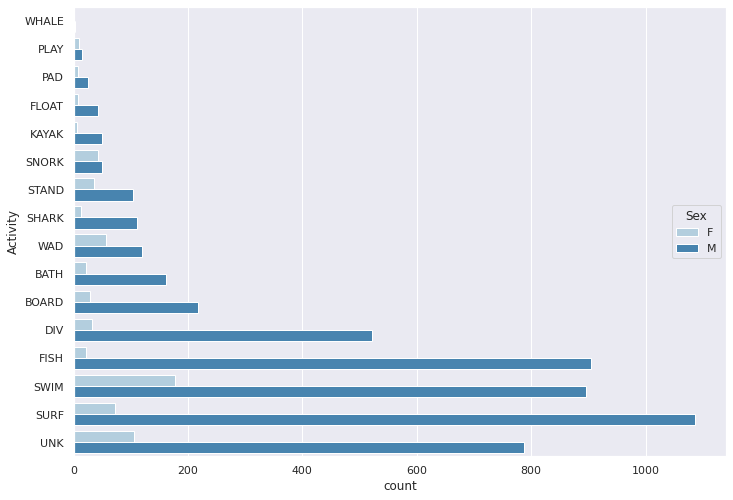

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("./outputs/act_out.csv",encoding = "ISO-8859-1")

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y = 'Activity', data = df, order = df['Activity'].value_counts(ascending=True).index, hue=df.Sex, palette="Blues")
plt.savefig('./fig/act.png')

## Conclusiones

De las activivades catalogadas el surf es la que más víctimas trae